In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [40]:
G_offset = 0.007 

V_resistor = np.array([0.000, 0.307, 0.628, 0.949, 1.258, 1.579, 1.900, 2.208, 2.530, 2.850, 3.275])
A_resistor = np.array([0.007, 0.036, 0.065, 0.095, 0.124, 0.156, 0.185, 0.214, 0.244, 0.274, 0.313])
A_resistor = 10 ** -3 * (A_resistor - G_offset)

G_offset = 0.007

V_in_green = np.array([0.000, 0.308, 0.631, 0.953, 1.262, 1.585, 1.907, 2.214, 2.528, 2.728, 2.941, 3.140, 3.230])
V_out_green = np.array([0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.067, 0.301, 0.471, 0.658, 0.837, 0.918])
V_green = V_in_green - V_out_green
A_green = np.array([0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.070, 0.288, 0.448, 0.622, 0.789, 0.865])
A_green = 0.001 * (A_green - G_offset)

G_offset = 0.004

V_in_red = np.array([0.000, 0.308, 0.631, 0.953, 1.262, 1.365, 1.481, 1.584, 1.901, 2.101, 2.301, 2.514, 2.613, 2.824, 2.923])
V_out_red = np.array([0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.004, 0.161, 0.332, 0.514, 0.713, 0.807, 1.009, 1.105])
V_red = V_in_red - V_out_red
A_red = np.array([0.004, 0.004, 0.004, 0.004, 0.004, 0.005, 0.005, 0.009, 0.157, 0.318, 0.488, 0.674, 0.762, 0.951, 1.041])
A_red = 0.001 * (A_red - G_offset)


In [41]:
def f_lin(x, m, c):
    return m * x + c


In [42]:
# Does the fit
lin_opt, lin_cov = opt.curve_fit(f_lin, A_resistor, V_resistor)

# Best fit values
m, b = lin_opt
dm, db = np.sqrt(np.diag(lin_cov))

print("m = %5.4f \u00b1 %5.4f" % (m, dm))
print("b = %5.4f \u00b1 %5.4f" % (b, db))


m = 10673.3277 ± 21.8783
b = 0.0020 ± 0.0039


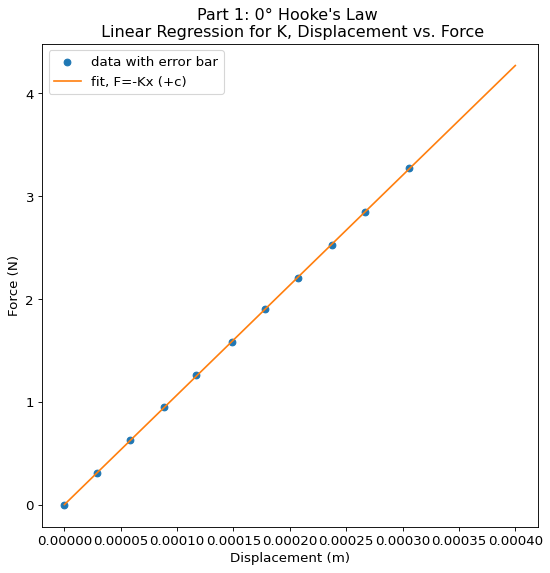

In [43]:
# Plotting data time!

fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.scatter(A_resistor, V_resistor, label="data with error bar")
plt.errorbar(np.linspace(0,.0004), f_lin(np.linspace(0,.0004), m, b), label='fit, F=-Kx (+c)', color='tab:orange')

plt.title("Part 1: 0° Hooke's Law \n Linear Regression for K, Displacement vs. Force")
plt.xlabel("Displacement (m)")
plt.ylabel("Force (N)")

# plt.text(.14,-.55, "k = %5.4f \u00b1 %5.4f $kg/s^2$" % (-m, dm))
# plt.text(.14,-.7, "c = %5.4f \u00b1 %5.4f $N$" % (b, db))
# plt.xlim(0,.257)
# plt.ylim(-3.7,0)
plt.legend()
plt.show()

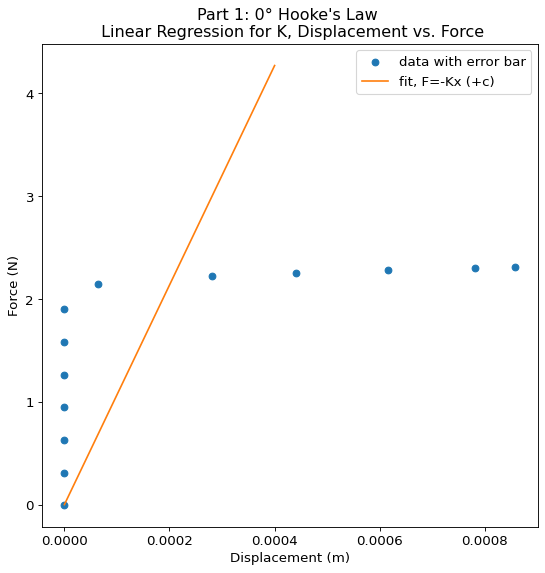

In [47]:
# Plotting data time!

fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.scatter(A_green, V_green, label="data with error bar")
plt.errorbar(np.linspace(0,.0004), f_lin(np.linspace(0,.0004), m, b), label='fit, F=-Kx (+c)', color='tab:orange')

plt.title("Part 1: 0° Hooke's Law \n Linear Regression for K, Displacement vs. Force")
plt.xlabel("Displacement (m)")
plt.ylabel("Force (N)")

# plt.text(.14,-.55, "k = %5.4f \u00b1 %5.4f $kg/s^2$" % (-m, dm))
# plt.text(.14,-.7, "c = %5.4f \u00b1 %5.4f $N$" % (b, db))
# plt.xlim(0,.257)
# plt.ylim(-3.7,0)
plt.legend()
plt.show()